# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: ANOVA
### VIDEO: Two-way mixed-effects ANOVA
#### TEACHER: Mike X Cohen, sincxpress.com

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd
import seaborn as sns

In [4]:
## the data and group labels

data = np.loadtxt(open("TwoWayMixedANOVA_data.csv"), delimiter=",")

timepoint = ['1']*45 + ['2']*45 + ['3']*45
groups = ['1']*15 + ['2']*15 + ['3']*15
s = []
for i in range(45):
    s += [str(i)]

# # convert to pandas
# np.matrix.flatten(data, 'F') собирает матрицу data в вектор;
# к концу строки матрицы добавляется следующая, следующая и так далее.
df = pd.DataFrame(data=np.matrix.flatten(data, 'F'), columns=['TheData'])
# np.tile(A, reps) - construct an array by repeating A the number of times given by reps
df['Group'] = np.tile(groups, 3)
df['TimePoint'] = timepoint
df['Subject'] = np.tile(s, 3)

# показывать все столбцы и все строки
# pd.set_option("display.max_rows", None, "display.max_columns", None) 
df

# Для понимания, данные можно интерпретировать как:
# 45 студентов (Subject) из 3 групп (Group) сдали экзамены по 3 предметам (TimePoint)
# два фактора, один фактор с повторными измерениями одних и теж же субъектов-студентов из разных групп
# -> two-way mixed-effects ANOVA

,TheData,Group,TimePoint,Subject
0,13.0,1,1,0
1,15.0,1,1,1
2,13.0,1,1,2
3,16.0,1,1,3
4,17.0,1,1,4
...,...,...,...,...
130,16.0,3,3,40
131,14.0,3,3,41
132,15.0,3,3,42
133,15.0,3,3,43


In [3]:
# DataFrame, dependent variable, between group factor, within-subject factor (repeated measurements),
# the between-subject identifier                           
pg.mixed_anova(data=df, dv='TheData', between='Group', within='TimePoint', subject='Subject')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,40.311111,2,42,20.155556,2.446942,9.880857e-02,0.104361,NaN
1,TimePoint,69.644444,2,84,34.822222,31.147184,7.588754e-11,0.425815,0.901879
2,Interaction,57.777778,4,84,14.444444,12.920019,3.051011e-08,0.380897,NaN


<AxesSubplot:xlabel='TimePoint', ylabel='TheData'>

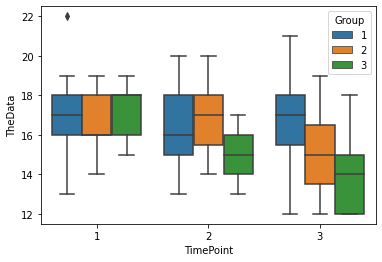

In [4]:
sns.boxplot(data=df, hue="Group", y="TheData", x='TimePoint');